In [ ]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Display all the columns no matter how many
pd.pandas.set_option("display.max_columns", None)

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

## Ingest

In [2]:
# Training set. Theres a separate testing set in the 'dataset folder'
house = pd.read_csv('dataset/train.csv', index_col='Id')
house.head()

# Basic exploration

In [4]:
house.shape

(1460, 80)

In [5]:
# house.info()

That is quit a lot. Lets use heatmap

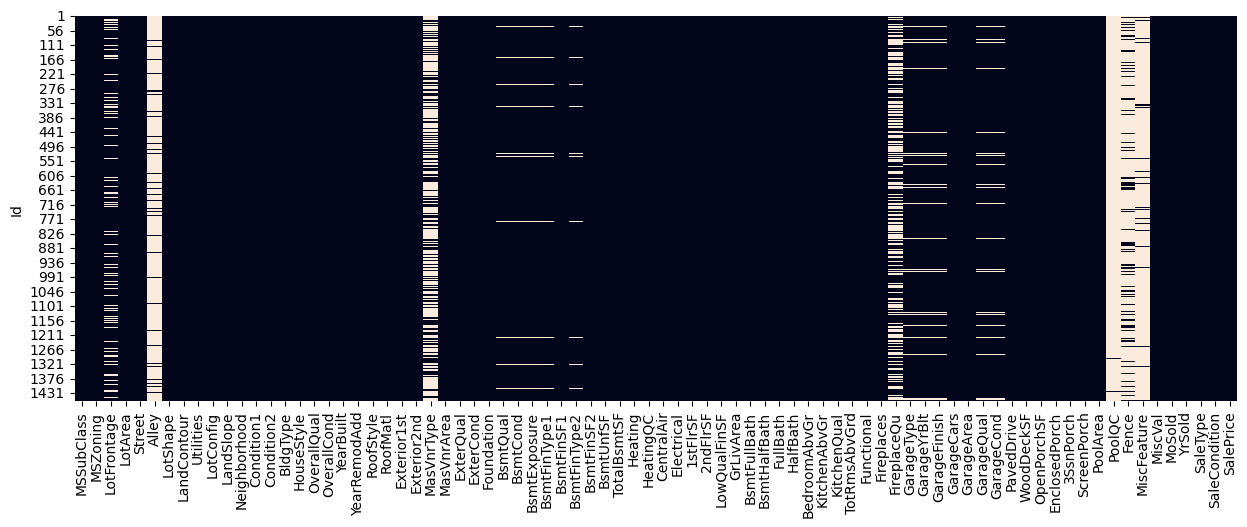

In [6]:
plt.figure(figsize=(15, 5))
sns.heatmap(house.isnull(), cbar=False);

In [7]:
from helper_functions import missing_data

In [8]:
# Checking missing data
missing_data(house, show_all=False)

,Total,Percent,Types
LotFrontage,259,17.739726,float64
Alley,1369,93.767123,object
MasVnrType,872,59.726027,object
MasVnrArea,8,0.547945,float64
BsmtQual,37,2.534247,object
BsmtCond,37,2.534247,object
BsmtExposure,38,2.602740,object
BsmtFinType1,37,2.534247,object
BsmtFinType2,38,2.602740,object
Electrical,1,0.068493,object


For a dataset that has 1460 columns, some houses contain way too many missing values.

It is safe to say that those houses dont have those features. e.g Garage - Fence - Basement - Pool - Misc feature

In [9]:
# Split the dataset into eda_df and validation set. We dont want insights from eda_df to spill into the validation set
X_train, X_val = train_test_split(house, test_size=0.2, stratify=house['Neighborhood'], shuffle=True, random_state=42)

In [10]:
X_train.shape, X_val.shape

((1168, 80), (292, 80))

Im stratifying by neighborhood to make sure that all the neighborhoods are in the train and test

In [11]:
# Make a copy of X_train so as to preserve it
eda_df = X_train.copy()

Basic data checking

In [12]:
from helper_functions import find_constant_columns

In [13]:
# Look for columns that contian missing values
find_constant_columns(eda_df)

[]

There are no columns that contain constant values

In [14]:
## Some numeric columns are categoricals
def numeric_to_categorical(df):
    cat_feats = ["MSSubClass", "OverallCond", "OverallQual", "MoSold"]
    df[cat_feats] = df[cat_feats].astype(object)
    return df

In [15]:
# Convert to categoricals
eda_df = numeric_to_categorical(eda_df)

In [16]:
# Check
eda_df[["MSSubClass", "OverallCond", "OverallQual", "MoSold"]].dtypes

MSSubClass     object
OverallCond    object
OverallQual    object
MoSold         object
dtype: object

In [17]:
### Get all imbalanced columns
from helper_functions import get_highly_imbalanced_columns

In [18]:
# Colums that have more than 95% of one value
imbs = get_highly_imbalanced_columns(eda_df, 0.95)
imbs, len(imbs)

(['Street',
  'Utilities',
  'LandSlope',
  'Condition2',
  'RoofMatl',
  'Heating',
  'LowQualFinSF',
  'KitchenAbvGr',
  'GarageQual',
  'GarageCond',
  '3SsnPorch',
  'PoolArea',
  'MiscVal'],
 13)

In [19]:
def drop_imbalanced_cols(df):
    df = df.drop(columns=[
         'Street', 'Utilities',
         'LandSlope', 'Condition2',
         'RoofMatl', 'Heating',
         'LowQualFinSF', 'KitchenAbvGr',
         'GarageQual', 'GarageCond',
         '3SsnPorch', 'PoolArea',
         'MiscVal'])
    return df

In [20]:
len(eda_df.columns)

80

In [21]:
eda_df = drop_imbalanced_cols(eda_df)

In [22]:
len(eda_df.columns)

67

The dataset is quite large to analyze.  
Split the data into numeric and categoricals.  Maybe the exploration will be easier that way

In [23]:
num_df = eda_df.select_dtypes(include=['number'])
cat_df = eda_df.select_dtypes(include=['object'])

num_df.shape, cat_df.shape

((1168, 28), (1168, 39))

# numeric columns

In [24]:
num_df.head(2)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
977,51.0,5900,1923,1958,0.0,0,0,440,440,869,0,869,0,0,1,0,2,4,0,NaN,0,0,0,0,0,0,2006,85500
131,88.0,14200,1966,1966,309.0,445,0,479,924,1216,941,2157,0,0,2,1,4,8,2,1966.0,2,487,105,66,0,0,2006,226000


In [25]:
num_df.shape

(1168, 28)

28 columns is more manageable

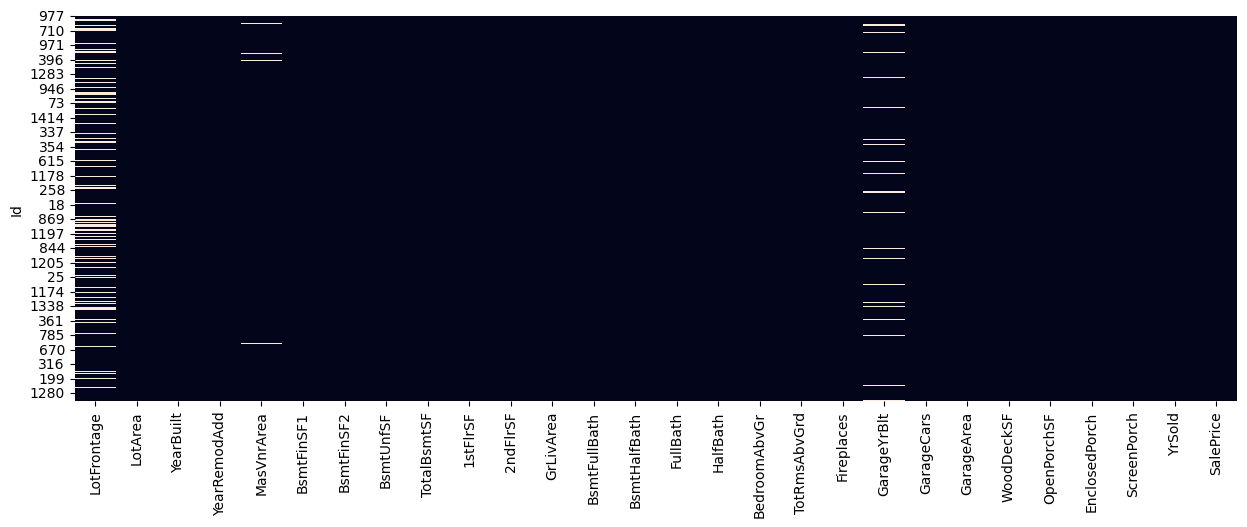

In [26]:
# Missing values heatmap
plt.figure(figsize=(15, 5))
sns.heatmap(num_df.isnull(), cbar=False);

In [27]:
# How many missing values do they have
num_df.isnull().sum()[num_df.isnull().sum() > 0]

LotFrontage    211
MasVnrArea       8
GarageYrBlt     63
dtype: int64

Observation: Alot of numeric columns dont have missing values

In [28]:
# Check for unique values
from helper_functions import unique_values

In [29]:
unique_values(num_df, max_colwidth=80)

,Total,Uniques,Values
BsmtHalfBath,1168,3,"[[0, 1, 2]]"
HalfBath,1168,3,"[[0, 1, 2]]"
Fireplaces,1168,4,"[[0, 2, 1, 3]]"
FullBath,1168,4,"[[1, 2, 0, 3]]"
BsmtFullBath,1168,4,"[[0, 1, 2, 3]]"
GarageCars,1168,5,"[[0, 2, 1, 3, 4]]"
YrSold,1168,5,"[[2006, 2009, 2007, 2008, 2010]]"
BedroomAbvGr,1168,7,"[[2, 4, 3, 1, 5, 0, 6]]"
TotRmsAbvGrd,1168,11,"[[4, 8, 6, 7, 5, 9, 10, 3, 11, 2, 12]]"
ScreenPorch,1168,61,"[[0, 170, 200, 120, 100, 163, 185, 216, 312, 168, 224, 142, 182, 276, 288, 2..."


Some columns here are categorical
MSSubclass, OverallCond, OverallQual, MoSold. 

Note: The code to convert them to categorical is above

#### Explore the target column

In [30]:
from helper_functions import mini_describe

In [31]:
# Create a dataframe with the sale price column for exploration purposes
saleprice = num_df.loc[:, ["SalePrice"]]

In [32]:
# Get numeric description
mini_describe(saleprice, "SalePrice")

,count,mean,std,min,25%,50%,75%,max,Range,IQR
SalePrice,1168.0,181100.552226,80998.216728,34900.0,129500.0,163000.0,214600.0,755000.0,720100.0,85100.0


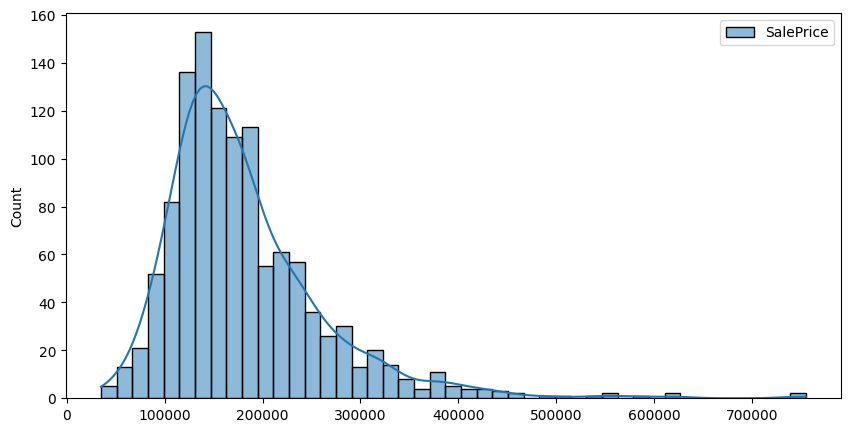

In [33]:
plt.figure(figsize=(10, 5))
sns.histplot(saleprice, kde=True);

+ Skewed to the right
+ unimodal
+ centered at about 163_000
+ Minimum house price is 34_900
+ Maximum house price is 7555_000. That is very much considering that the 75 percentile price is at 214,600

In [34]:
# How many in the eda_df data are more costly than 500_000
len(saleprice[saleprice.SalePrice > 500000])

9

Only 9. 

I believe that attempting to remove these outlier houses will be detrimental. 
Those kinds of houses will be in the vaidation set as well as the test set

We should attempt to normalize this column and see whether it becomes more normal

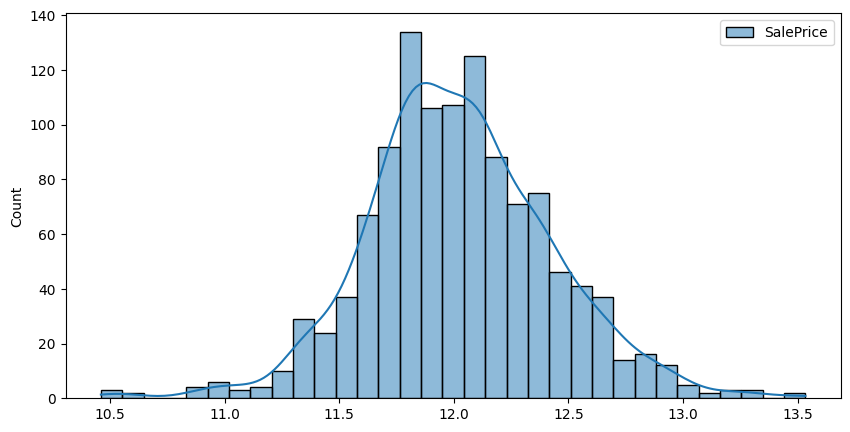

In [35]:
plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(saleprice), kde=True);

The log transformation seems to make it better.
Although there seems to be some outliers more at the left than the right

####  Explore year features

Let's see what we can extract from those variables

In [36]:
# Check for columns which have "Yr" or "Year in thm"
year_features = [feat for feat in num_df.columns if "Yr" in feat or "Year" in feat]
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [37]:
# Create a dataframe to explore the year features
years = num_df.loc[:, year_features]
years["SalePrice"] = num_df.loc[:, "SalePrice"]
years.head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,SalePrice
Id,,,,,
977,1923,1958,NaN,2006,85500
131,1966,1966,1966.0,2006,226000
342,1950,1950,1950.0,2009,82000
1107,1990,1991,1990.0,2007,179900
1325,2006,2007,2007.0,2007,147000


Create new age features

Calculate the difference between all these variables and YrSold
Check if they have a relationship with the sale price of the house

In [38]:
# Add new columns
def add_age(df):
    df["Age"]=df["YrSold"] - df["YearBuilt"]
    df["RemodAddAge"]=df["YrSold"] - df["YearRemodAdd"]
    df["GrgAge"]=df["YrSold"] - df["GarageYrBlt"]
    return df

In [39]:
years = add_age(years)

In [40]:
years.describe()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,SalePrice,Age,RemodAddAge,GrgAge
count,1168.000000,1168.000000,1105.000000,1168.000000,1168.000000,1168.000000,1168.000000,1105.000000
mean,1971.002568,1984.851027,1978.161991,2007.853596,181100.552226,36.851027,23.002568,29.691403
std,30.259078,20.644709,24.855233,1.321487,80998.216728,30.317826,20.626083,24.893937
min,1872.000000,1950.000000,1900.000000,2006.000000,34900.000000,0.000000,0.000000,0.000000
25%,1954.000000,1967.000000,1961.000000,2007.000000,129500.000000,8.000000,4.000000,7.000000
50%,1972.000000,1994.000000,1979.000000,2008.000000,163000.000000,35.000000,14.000000,28.000000
75%,2000.000000,2004.000000,2002.000000,2009.000000,214600.000000,55.000000,41.000000,47.000000
max,2010.000000,2010.000000,2010.000000,2010.000000,755000.000000,136.000000,60.000000,107.000000


There does not seem to be any signs of inconsistent entries

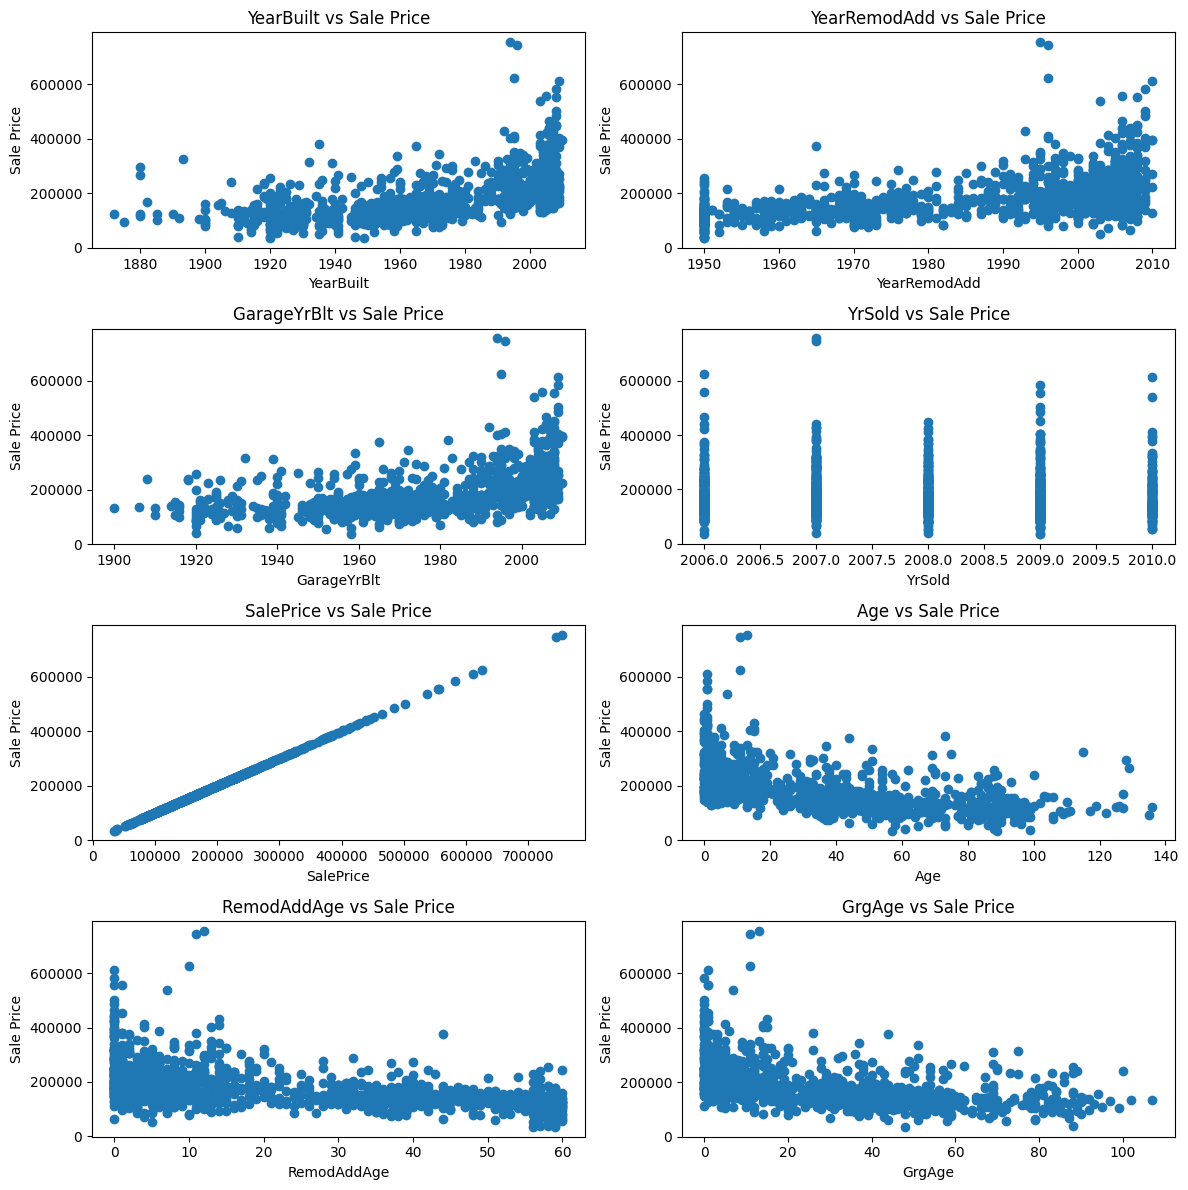

In [41]:
# Scatter plot

plots_per_line = 2

num_plots = len(years.columns) - 1
num_rows = (num_plots + plots_per_line - 1) // plots_per_line

fig, axs = plt.subplots(num_rows, plots_per_line, figsize = (12, 3 * num_rows))

axs = axs.flatten() if num_rows > 1 else [axs]

for i, col in enumerate(years.columns[:]):
    row_index = i // plots_per_line
    col_index = i % plots_per_line
    axs[i].scatter(years[col], years["SalePrice"])
    axs[i].set_title(f"{col} vs Sale Price")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Sale Price")

plt.tight_layout()
plt.show()

There's a downtrend that suggest that the older a house, the lesser its price. This makes sense.
Obviously thats the general trend but its not too strong
But newer houses seem to be reflectiong higher prices

Drop all the year columns. They seem to be reflecting the same thing as their Age

In [42]:
def drop_years(df):
    df = df.drop(columns=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'])
    return df

In [43]:
years = drop_years(years)

In [44]:
years.columns, type(years), years.shape

(Index(['SalePrice', 'Age', 'RemodAddAge', 'GrgAge'], dtype='object'),
 pandas.core.frame.DataFrame,
 (1168, 4))

#### Explore features that involve Counts

In [1]:
# unique_values(num_df)

All numeric features that involves some kind of count

In [46]:
count_features = [
    "HalfBath", "BsmtHalfBath", "BsmtFullBath",
    "FullBath", "Fireplaces",
    "GarageCars", "BedroomAbvGr", "TotRmsAbvGrd"]

In [47]:
# Create a dataframe with those features
counts = num_df.loc[:, count_features]
counts.head()

,HalfBath,BsmtHalfBath,BsmtFullBath,FullBath,Fireplaces,GarageCars,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,,
977,0,0,0,1,0,0,2,4
131,1,0,0,2,2,2,4,8
342,0,0,0,1,0,1,2,4
1107,0,0,1,2,1,2,3,6
1325,0,0,0,2,1,3,2,7


In [48]:
# Cehck form missing values
counts.isnull().sum()[counts.isnull().sum() > 0]

Series([], dtype: int64)

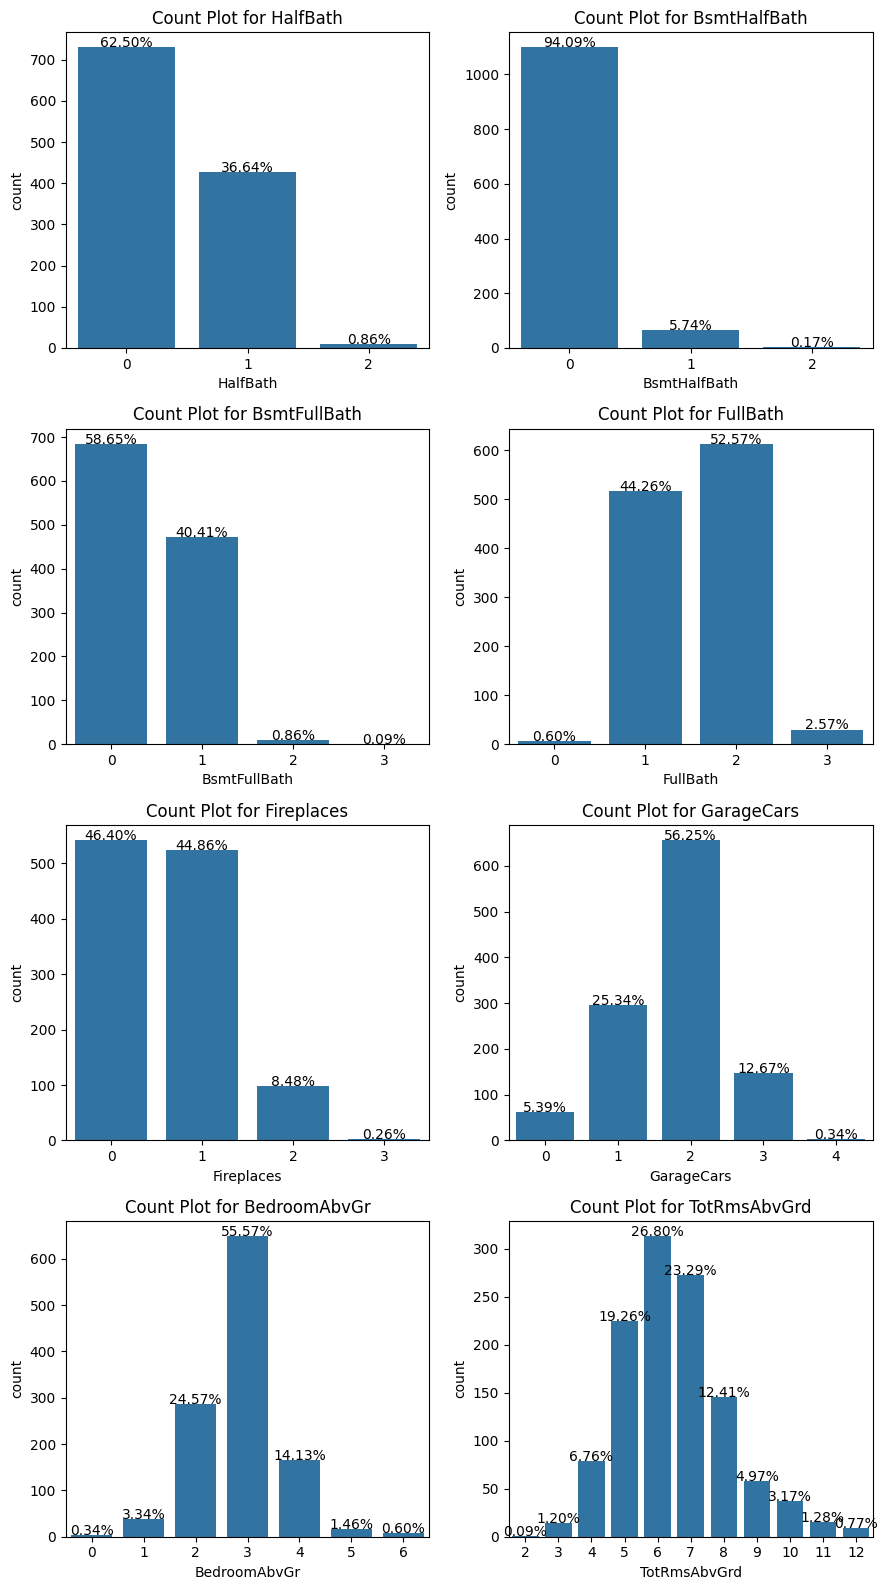

In [49]:
# Count plot
total_rows = len(counts)
percentages = (counts.value_counts() / total_rows) * 100

# Plot count plots with percentages
num_count_cols = len(counts.columns)
fig, axs = plt.subplots(nrows=(num_count_cols + 1) // 2, ncols=2, figsize=(9, 4 * ((num_count_cols + 1) // 2)))

for i, col in enumerate(counts.columns):
    ax = axs[i // 2, i % 2]
    sns.countplot(x=col, data=counts, ax=ax)
    ax.set_title(f'Count Plot for {col}')
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
                f'{height / total_rows * 100:.2f}%', ha='center')

plt.tight_layout()
plt.show()

Some columns are too skewed e.g BsmtHalfBath

In [50]:
def drop_skewed_counts(df):
    df = df.drop(columns=["BsmtHalfBath"])
    return df

In [51]:
print(len(counts.columns))
counts = drop_skewed_counts(counts)
len(counts.columns)

8

In [53]:
# Add the dependent feature to the dataframe
counts["SalePrice"] = num_df.loc[:, "SalePrice"]
counts.head()

,HalfBath,BsmtFullBath,FullBath,Fireplaces,GarageCars,BedroomAbvGr,TotRmsAbvGrd,SalePrice
Id,,,,,,,,
977,0,0,1,0,0,2,4,85500
131,1,0,2,2,2,4,8,226000
342,0,0,1,0,1,2,4,82000
1107,0,1,2,1,2,3,6,179900
1325,0,0,2,1,3,2,7,147000


In [54]:
# Get the name of the features
box_cols = [feat for feat in counts.columns if feat != "SalePrice"]
box_cols

['HalfBath',
 'BsmtFullBath',
 'FullBath',
 'Fireplaces',
 'GarageCars',
 'BedroomAbvGr',
 'TotRmsAbvGrd']

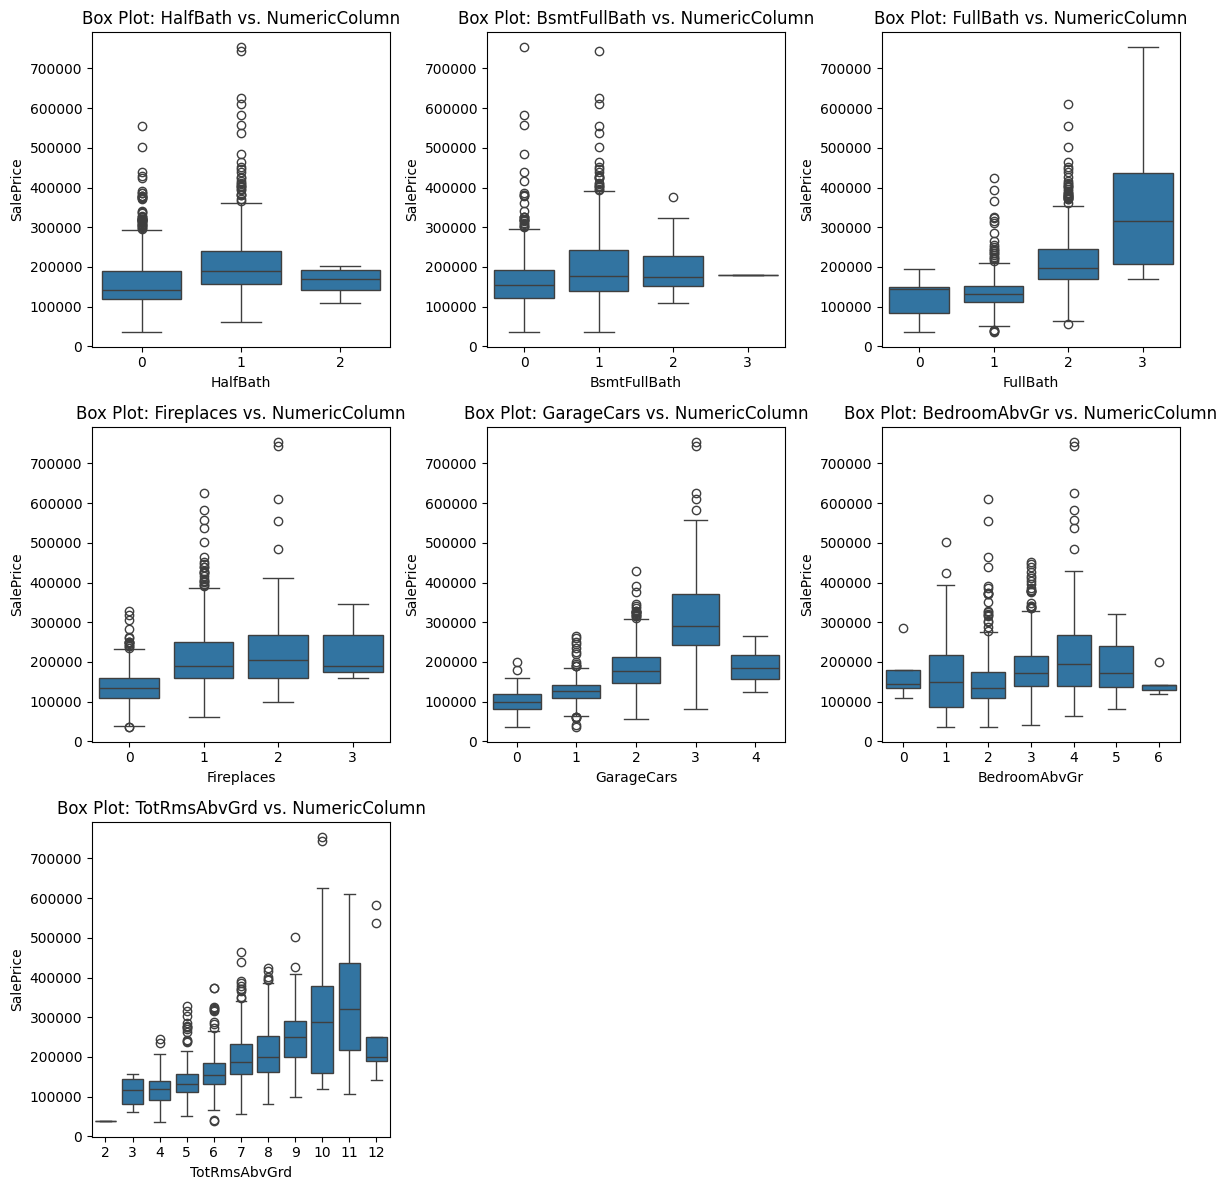

In [55]:
# Plot side-by-side box plots with 3 plots per row
num_plots = len(box_cols)
num_rows = (num_plots + 2) // 3  # Calculate number of rows for subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(12, 4*num_rows))

# Flatten the axs array to iterate over subplots
axs_flat = axs.flatten()

for i, col in enumerate(box_cols):
    ax = axs_flat[i]
    sns.boxplot(x=col, y='SalePrice', data=counts, ax=ax)
    ax.set_title(f'Box Plot: {col} vs. Saleprice')
    ax.set_xlabel(col)
    ax.set_ylabel('SalePrice')

# Hide empty subplots if num_plots is not a multiple of 3
for j in range(num_plots, num_rows*3):
    axs_flat[j].axis('off')

plt.tight_layout()
plt.show()

There seem to be an increase in price range for houses with TotalRmsAbvGrd and FullBath
There seem to be an increase in price range for houses with GarageCars up to 3 cars
The rest have no obvious correlations

#### Explore Discrete numeric variables

In [56]:
# unique_values(num_df)

Get the names of disceret features. Features that have less than 25 unique values. 
Make sure you've not explored them before

In [57]:
# num_cols, year_features, count_features

In [58]:
# Get the names of discrete features
discrete = [feat for feat in num_df.columns 
            if len(num_df[feat].unique()) < 25 and 
            feat not in year_features and
            feat not in count_features
           ]
discrete

[]

There are no more discrete features

#### The rest of the numeric columns

In [59]:
# num_cols, year_features, count_features, discrete

In [60]:
# Get the names of some the remaining features
continuous = [feat for feat in num_df.columns
              if len(num_df[feat].unique()) > 25 and
              feat not in year_features and
              feat not in count_features and
              feat not in discrete]
continuous

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [61]:
num_continuous = num_df.loc[:, continuous]
num_continuous.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
Id,,,,,,,,,,,,,,,,
977,51.0,5900,0.0,0,0,440,440,869,0,869,0,0,0,0,0,85500
131,88.0,14200,309.0,445,0,479,924,1216,941,2157,487,105,66,0,0,226000
342,60.0,8400,0.0,0,0,721,721,841,0,841,294,250,0,24,0,82000
1107,114.0,10357,0.0,738,0,172,910,1442,0,1442,719,0,244,0,0,179900
1325,75.0,9986,428.0,0,0,1795,1795,1795,0,1795,895,0,49,0,0,147000


In [62]:
num_continuous.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
count,957.000000,1168.000000,1160.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,70.134796,10577.892123,102.987931,440.101027,48.105308,569.645548,1057.851884,1162.654966,346.427226,1514.470034,475.00000,95.614726,46.720890,22.422089,14.708904,181100.552226
std,25.260476,10715.520454,184.228227,461.747914,163.787938,441.781491,449.097632,392.210063,435.617148,525.411357,214.79892,125.943904,66.575553,62.022779,55.536867,80998.216728
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.00000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,58.000000,7590.000000,0.000000,0.000000,0.000000,225.000000,793.000000,884.000000,0.000000,1123.750000,336.00000,0.000000,0.000000,0.000000,0.000000,129500.000000
50%,70.000000,9458.500000,0.000000,376.000000,0.000000,484.000000,990.000000,1077.000000,0.000000,1456.000000,480.00000,0.000000,25.000000,0.000000,0.000000,163000.000000
75%,80.000000,11515.500000,160.000000,714.500000,0.000000,806.500000,1293.750000,1383.000000,728.000000,1788.000000,576.00000,168.000000,69.000000,0.000000,0.000000,214600.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,1418.00000,736.000000,547.000000,552.000000,480.000000,755000.000000


In [63]:
# continuous

Split them into two.

In [64]:
area = ['LotFrontage', 'LotArea', 'MasVnrArea', 
        'GrLivArea', 'GarageArea']

sf = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
      '1stFlrSF', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF',
      'EnclosedPorch', 'ScreenPorch']

#### Area

In [65]:
area_features = ['LotFrontage', 'LotArea', 'MasVnrArea', 
        'GrLivArea', 'GarageArea']

In [66]:
num_area = num_df.loc[:, area_features]
num_area["SalePrice"] = num_df.loc[:, "SalePrice"]
num_area.head()

,LotFrontage,LotArea,MasVnrArea,GrLivArea,GarageArea,SalePrice
Id,,,,,,
977,51.0,5900,0.0,869,0,85500
131,88.0,14200,309.0,2157,487,226000
342,60.0,8400,0.0,841,294,82000
1107,114.0,10357,0.0,1442,719,179900
1325,75.0,9986,428.0,1795,895,147000


In [67]:
num_area.isnull().sum()

LotFrontage    211
LotArea          0
MasVnrArea       8
GrLivArea        0
GarageArea       0
SalePrice        0
dtype: int64

In [68]:
num_area.describe()

,LotFrontage,LotArea,MasVnrArea,GrLivArea,GarageArea,SalePrice
count,957.000000,1168.000000,1160.000000,1168.000000,1168.00000,1168.000000
mean,70.134796,10577.892123,102.987931,1514.470034,475.00000,181100.552226
std,25.260476,10715.520454,184.228227,525.411357,214.79892,80998.216728
min,21.000000,1300.000000,0.000000,334.000000,0.00000,34900.000000
25%,58.000000,7590.000000,0.000000,1123.750000,336.00000,129500.000000
50%,70.000000,9458.500000,0.000000,1456.000000,480.00000,163000.000000
75%,80.000000,11515.500000,160.000000,1788.000000,576.00000,214600.000000
max,313.000000,215245.000000,1600.000000,5642.000000,1418.00000,755000.000000


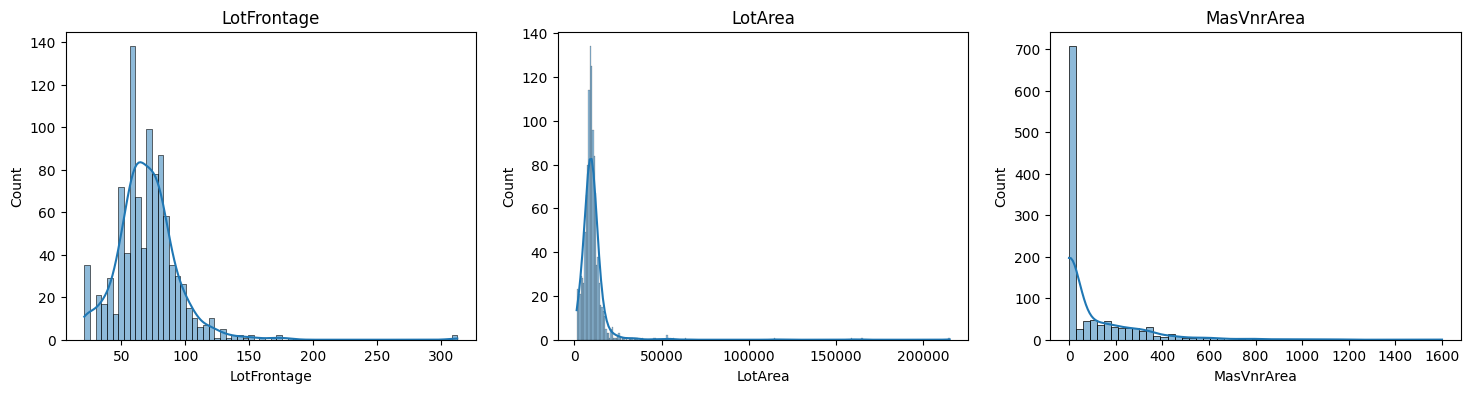

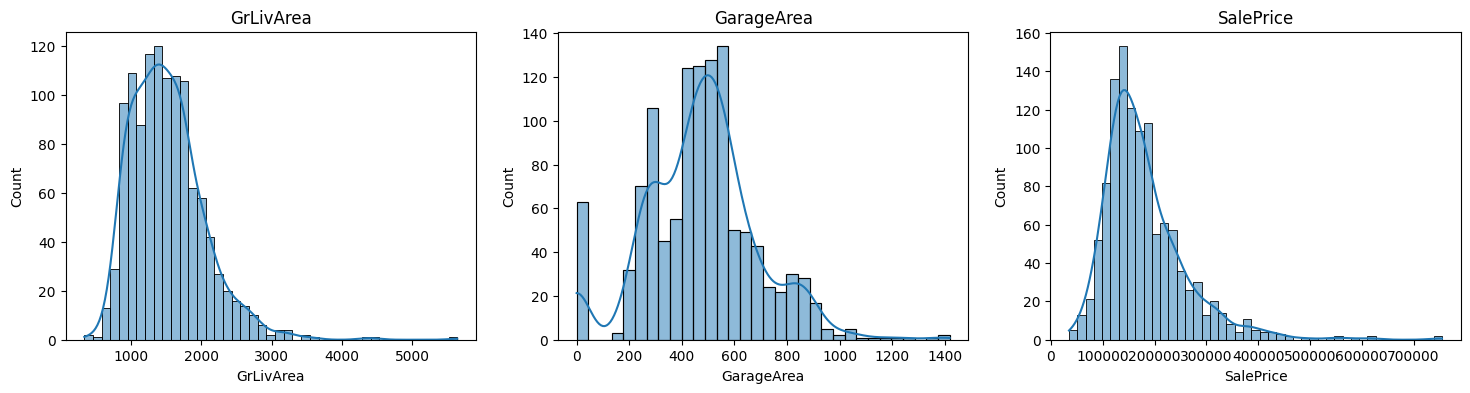

<Figure size 1800x400 with 0 Axes>

In [69]:
# Histogram of all features
ix = 1
fig = plt.figure(figsize = (18, 4));
for col in num_area.columns:
    if ix <= 3:
        ax1 = fig.add_subplot(1,3,ix);
        sns.histplot(data=num_area, x=col, kde=True)
        plt.title(col)
        # plt.show();
        
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (18, 4));
        ix =1    

LotArea, MasVnrArea are extremely negatively skewed
The rest are negatively skewed

Nothing that log transformation cannot solve

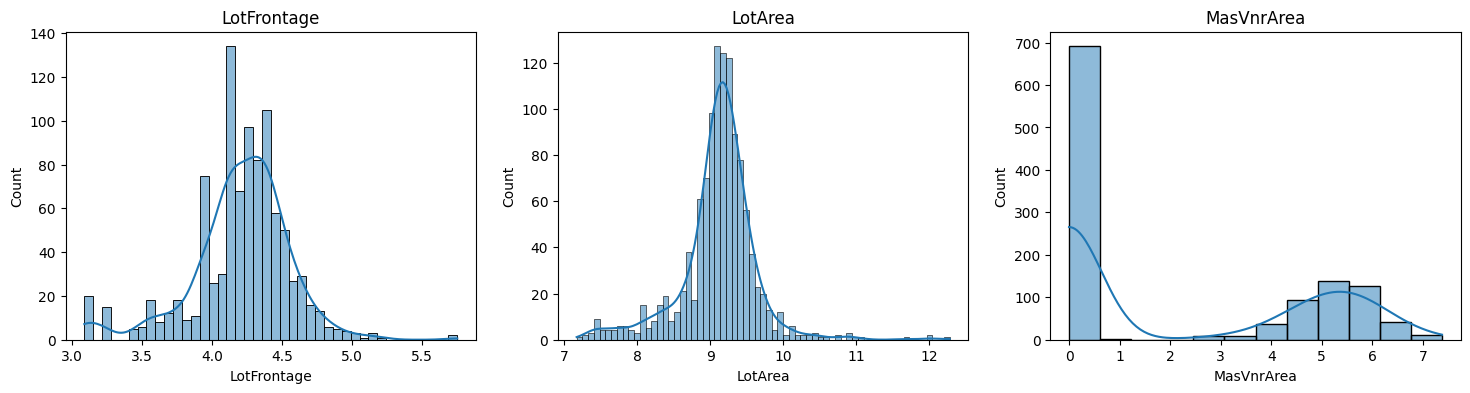

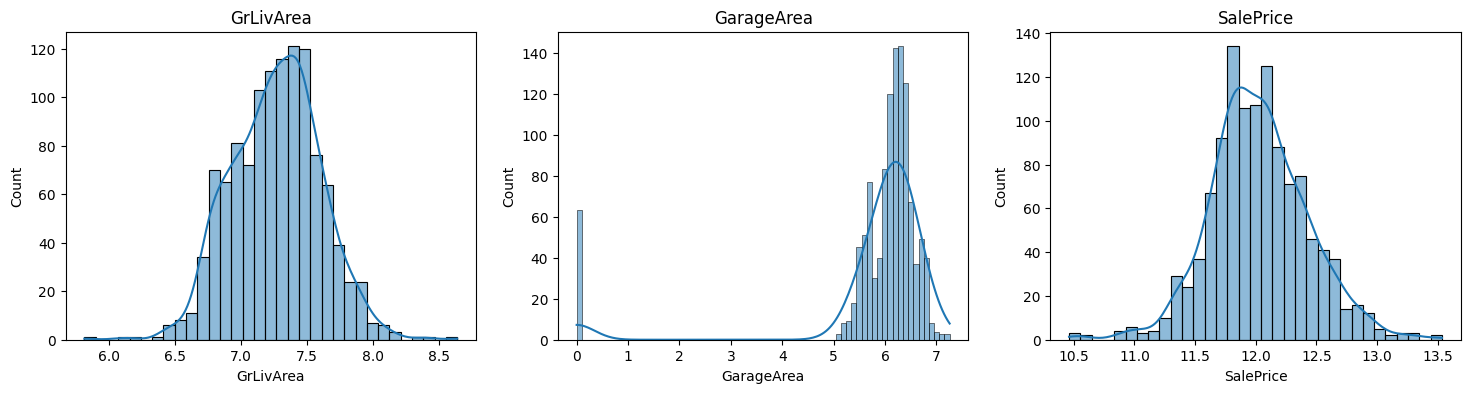

<Figure size 1800x400 with 0 Axes>

In [70]:
# Histogram of all features
ix = 1
fig = plt.figure(figsize = (18, 4));
for col in np.log1p(num_area).columns:
    if ix <= 3:
        ax1 = fig.add_subplot(1,3,ix);
        sns.histplot(data=np.log1p(num_area), x=col, kde=True)
        plt.title(col)
        # plt.show();
        
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (18, 4));
        ix =1    

Log transformation did not work on MasVnrArea and GarageArea

#### Squarefeet features

In [71]:
sf_features = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
      '1stFlrSF', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF',
      'EnclosedPorch', 'ScreenPorch']

In [72]:
num_sf = num_df.loc[:, sf_features]
num_sf["SalePrice"] = num_df.loc[:, "SalePrice"]
num_sf.head()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
Id,,,,,,,,,,,
977,0,0,440,440,869,0,0,0,0,0,85500
131,445,0,479,924,1216,941,105,66,0,0,226000
342,0,0,721,721,841,0,250,0,24,0,82000
1107,738,0,172,910,1442,0,0,244,0,0,179900
1325,0,0,1795,1795,1795,0,0,49,0,0,147000


In [73]:
num_sf.isnull().sum()

BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
ScreenPorch      0
SalePrice        0
dtype: int64

In [74]:
num_sf.describe()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,440.101027,48.105308,569.645548,1057.851884,1162.654966,346.427226,95.614726,46.720890,22.422089,14.708904,181100.552226
std,461.747914,163.787938,441.781491,449.097632,392.210063,435.617148,125.943904,66.575553,62.022779,55.536867,80998.216728
min,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,0.000000,0.000000,225.000000,793.000000,884.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129500.000000
50%,376.000000,0.000000,484.000000,990.000000,1077.000000,0.000000,0.000000,25.000000,0.000000,0.000000,163000.000000
75%,714.500000,0.000000,806.500000,1293.750000,1383.000000,728.000000,168.000000,69.000000,0.000000,0.000000,214600.000000
max,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,736.000000,547.000000,552.000000,480.000000,755000.000000


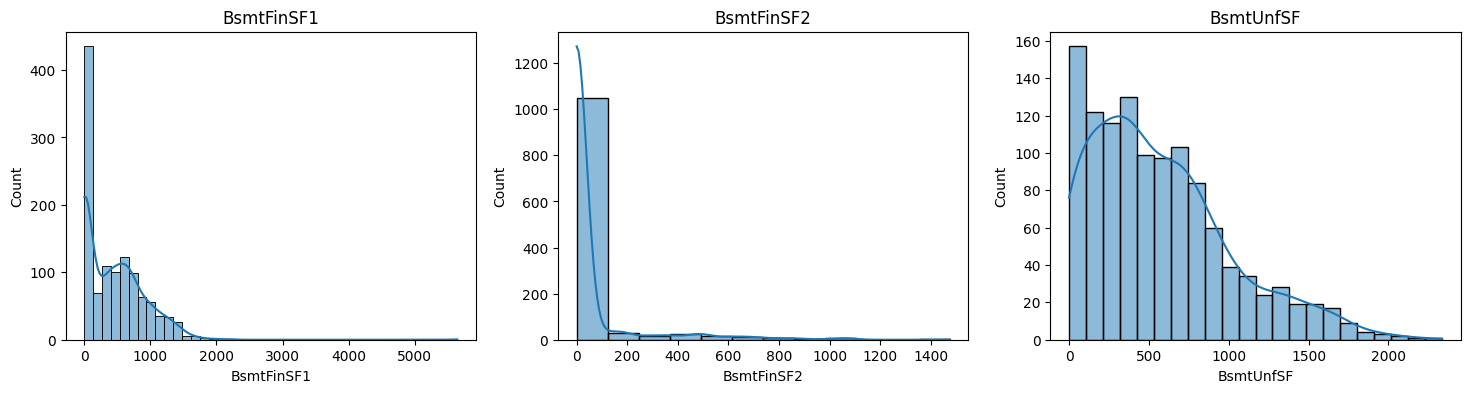

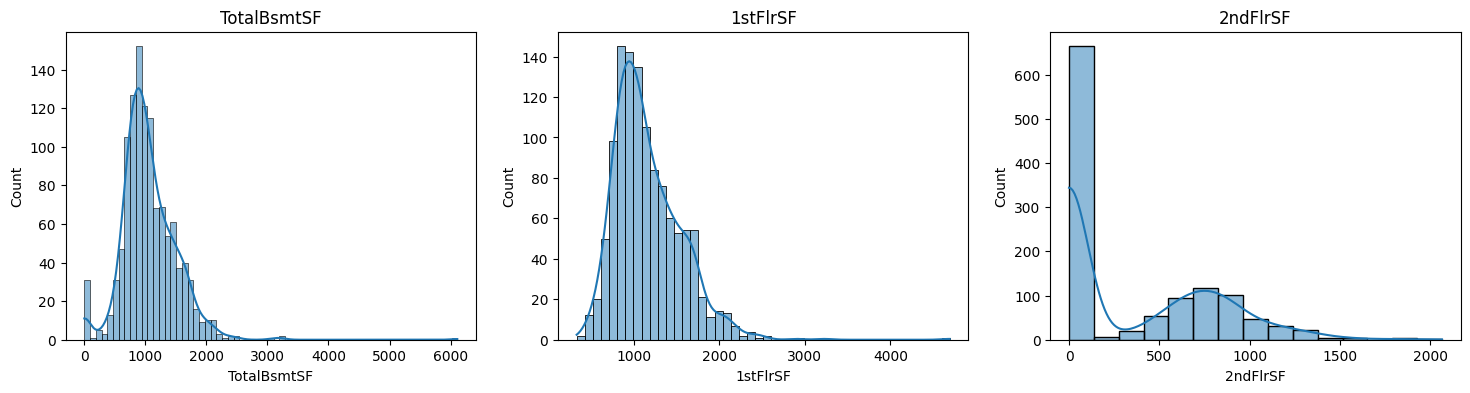

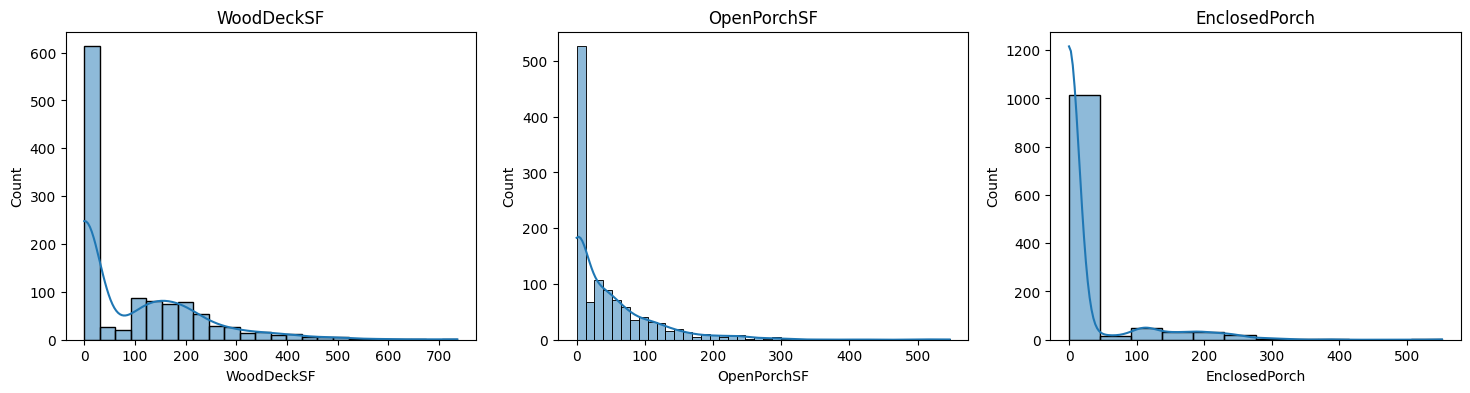

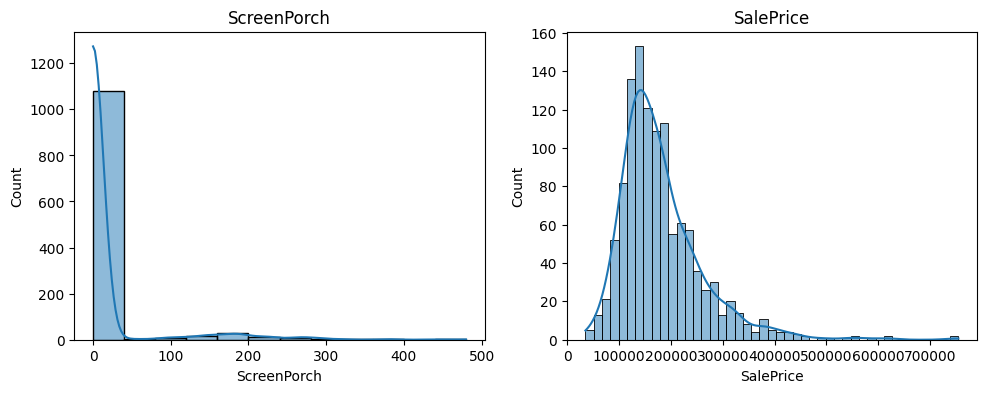

In [75]:
# Histogram of all features
ix = 1
fig = plt.figure(figsize = (18, 4));
for col in num_sf.columns:
    if ix <= 3:
        ax1 = fig.add_subplot(1,3,ix);
        sns.histplot(data=num_sf, x=col, kde=True)
        plt.title(col)
        # plt.show();
        
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (18, 4));
        ix =1    

In [76]:
# num_sf.EnclosedPorch.value_counts() / len(num_sf)
# num_sf.EnclosedPorch.value_counts()

Dont drop them. Let the model determine whether to use them or not

# Categorical columns

In [77]:
cat_df["SalePrice"] = num_df.loc[:, "SalePrice"]
cat_df = cat_df.fillna('missing')
cat_df.head()

,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
977,30,RL,missing,IR1,Bnk,Inside,BrkSide,Norm,1Fam,1Story,4,7,Gable,Wd Sdng,Wd Sdng,missing,TA,TA,PConc,Gd,TA,No,Unf,Unf,TA,Y,FuseA,Fa,Typ,missing,missing,missing,Y,missing,missing,missing,8,WD,Normal,85500
131,60,RL,missing,Reg,Lvl,Corner,NAmes,Norm,1Fam,2Story,7,6,Gable,MetalSd,MetalSd,BrkFace,TA,TA,CBlock,TA,TA,No,Rec,Unf,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,Y,missing,GdPrv,missing,5,WD,Normal,226000
342,20,RH,missing,Reg,Lvl,Inside,SawyerW,Feedr,1Fam,1Story,4,4,Gable,Wd Sdng,AsbShng,missing,Fa,Fa,CBlock,TA,Fa,No,Unf,Unf,Gd,Y,SBrkr,TA,Typ,missing,CarPort,Unf,N,missing,missing,missing,9,WD,Normal,82000
1107,20,RL,missing,IR1,Lvl,Corner,SawyerW,Feedr,1Fam,1Story,7,5,Hip,HdBoard,HdBoard,missing,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,Gd,Y,SBrkr,Gd,Typ,TA,Attchd,Fin,Y,missing,missing,missing,5,WD,Normal,179900
1325,20,RL,missing,Reg,Lvl,Inside,Somerst,Norm,1Fam,1Story,8,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Ex,TA,Av,Unf,Unf,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,Y,missing,missing,missing,2,New,Partial,147000


In [78]:
# These are the columns with missing values
get_highly_imbalanced_columns(cat_df, 0.9)

['Alley',
 'LandContour',
 'CentralAir',
 'Electrical',
 'Functional',
 'PavedDrive',
 'PoolQC',
 'MiscFeature']

In [79]:
def drop_imbalanced(df):
    df = df.drop(columns=[
        'Alley', 'LandContour',
        'CentralAir', 'Electrical',
        'Functional', 'PavedDrive',
        'PoolQC', 'MiscFeature'])
    return df

In [80]:
cat_df = drop_imbalanced(cat_df)
cat_df.head()

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,Fence,MoSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
977,30,RL,IR1,Inside,BrkSide,Norm,1Fam,1Story,4,7,Gable,Wd Sdng,Wd Sdng,missing,TA,TA,PConc,Gd,TA,No,Unf,Unf,TA,Fa,missing,missing,missing,missing,8,WD,Normal,85500
131,60,RL,Reg,Corner,NAmes,Norm,1Fam,2Story,7,6,Gable,MetalSd,MetalSd,BrkFace,TA,TA,CBlock,TA,TA,No,Rec,Unf,Ex,Gd,Gd,Attchd,Fin,GdPrv,5,WD,Normal,226000
342,20,RH,Reg,Inside,SawyerW,Feedr,1Fam,1Story,4,4,Gable,Wd Sdng,AsbShng,missing,Fa,Fa,CBlock,TA,Fa,No,Unf,Unf,Gd,TA,missing,CarPort,Unf,missing,9,WD,Normal,82000
1107,20,RL,IR1,Corner,SawyerW,Feedr,1Fam,1Story,7,5,Hip,HdBoard,HdBoard,missing,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,Gd,Gd,TA,Attchd,Fin,missing,5,WD,Normal,179900
1325,20,RL,Reg,Inside,Somerst,Norm,1Fam,1Story,8,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Ex,TA,Av,Unf,Unf,Ex,Gd,Gd,Attchd,RFn,missing,2,New,Partial,147000


In [81]:
cat_feats = cat_df.columns
cat_feats

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence', 'MoSold',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [82]:
unique_values(cat_df)

,Total,Uniques,Values
ExterCond,1168,4,"[[TA, Fa, Gd, Ex]]"
KitchenQual,1168,4,"[[Fa, Gd, TA, Ex]]"
HeatingQC,1168,4,"[[TA, Ex, Gd, Fa]]"
ExterQual,1168,4,"[[TA, Fa, Gd, Ex]]"
MasVnrType,1168,4,"[[missing, BrkFace, BrkCmn, Stone]]"
GarageFinish,1168,4,"[[missing, Fin, Unf, RFn]]"
LotShape,1168,4,"[[IR1, Reg, IR2, IR3]]"
BldgType,1168,5,"[[1Fam, TwnhsE, Duplex, Twnhs, 2fmCon]]"
MSZoning,1168,5,"[[RL, RH, RM, C (all), FV]]"
BsmtExposure,1168,5,"[[No, Mn, Av, Gd, missing]]"


In [83]:
cat_cols = cat_df.columns
cat_cols

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence', 'MoSold',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

#### Less than 5 featires

In [84]:
# Get the names of some discrete features
less5_feats = [feat for feat in cat_cols 
            if len(cat_df[feat].unique()) < 5]
less5_feats

['LotShape',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'HeatingQC',
 'KitchenQual',
 'GarageFinish']

In [85]:
less5_df = cat_df.loc[:, less5_feats]
# less5_df["SalePrice"] = num_df.loc[:, "SalePrice"]
less5_df.head()

,LotShape,MasVnrType,ExterQual,ExterCond,HeatingQC,KitchenQual,GarageFinish
Id,,,,,,,
977,IR1,missing,TA,TA,TA,Fa,missing
131,Reg,BrkFace,TA,TA,Ex,Gd,Fin
342,Reg,missing,Fa,Fa,Gd,TA,Unf
1107,IR1,missing,Gd,TA,Gd,Gd,Fin
1325,Reg,BrkFace,Gd,TA,Ex,Gd,RFn


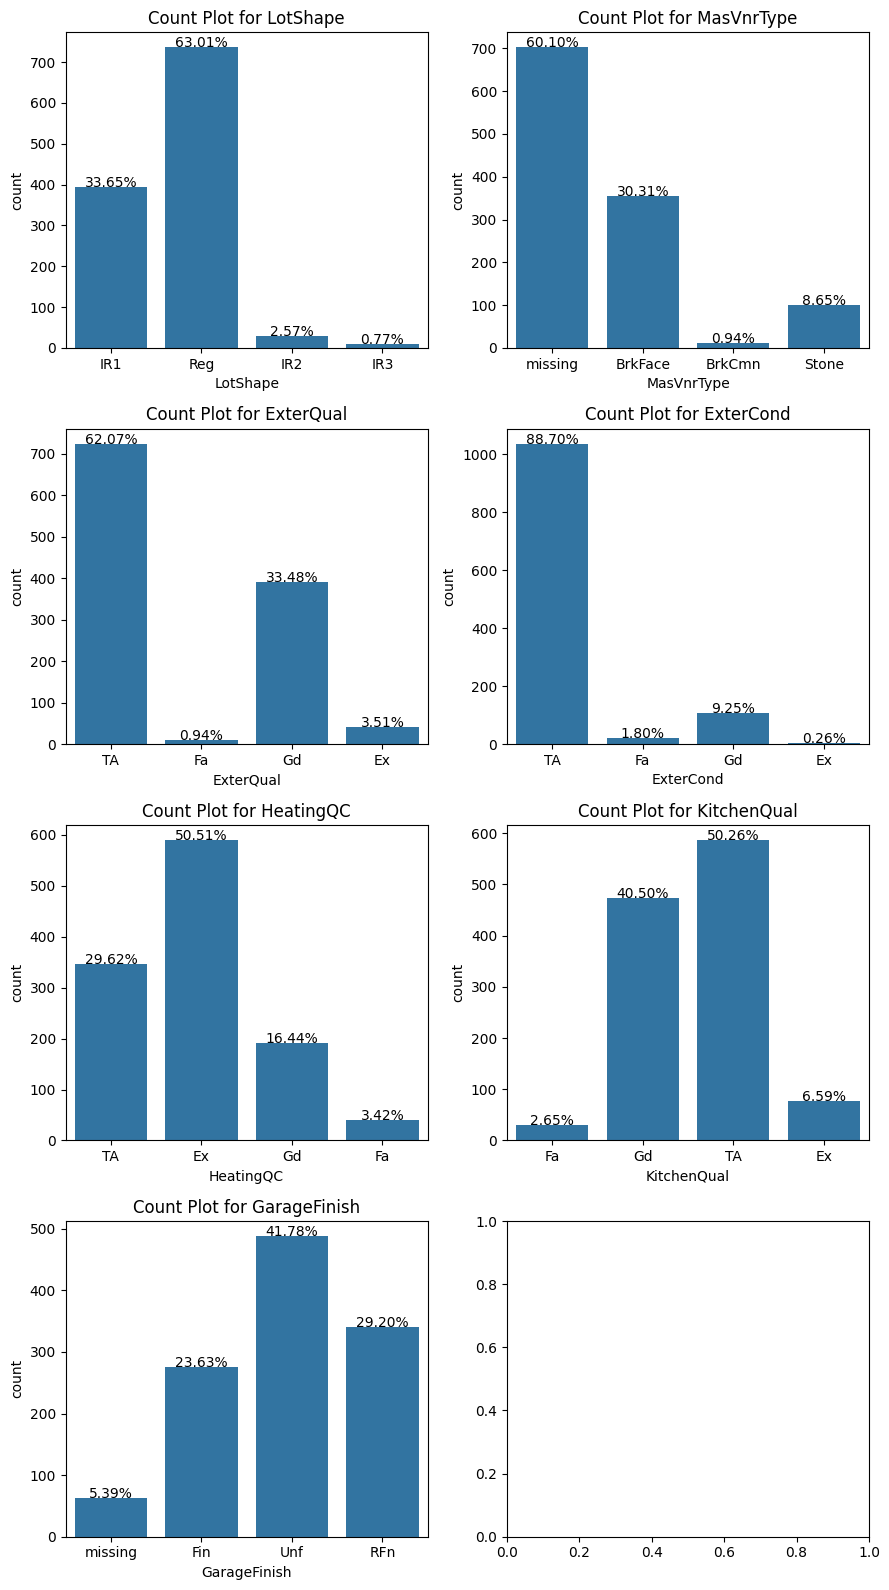

In [86]:
# Calculate percentage for each count
total_rows = len(less5_df)
percentages = (less5_df.value_counts() / total_rows) * 100

# Plot count plots with percentages
num_count_cols = len(less5_df.columns)
fig, axs = plt.subplots(nrows=(num_count_cols + 1) // 2, ncols=2, figsize=(9, 4 * ((num_count_cols + 1) // 2)))

for i, col in enumerate(less5_df.columns):
    ax = axs[i // 2, i % 2]
    sns.countplot(x=col, data=less5_df, ax=ax)
    ax.set_title(f'Count Plot for {col}')
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
                f'{height / total_rows * 100:.2f}%', ha='center')

plt.tight_layout()
plt.show()

#### 5 to 10 features

In [87]:
# Get the names of some discrete features
fiveten_feats = [feat for feat in cat_cols 
            if (cat_df[feat].nunique()) >= 5 and
                 (cat_df[feat].nunique()) <= 10
                ]
fiveten_feats

['MSZoning',
 'LotConfig',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'Fence',
 'SaleType',
 'SaleCondition']

In [88]:
fiveten_df = cat_df.loc[:, fiveten_feats]
fiveten_df = fiveten_df.fillna('missing')
# fiveten_df["SalePrice"] = num_df.loc[:, "SalePrice"]
fiveten_df.head()

,MSZoning,LotConfig,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,Fence,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,
977,RL,Inside,Norm,1Fam,1Story,4,7,Gable,PConc,Gd,TA,No,Unf,Unf,missing,missing,missing,WD,Normal
131,RL,Corner,Norm,1Fam,2Story,7,6,Gable,CBlock,TA,TA,No,Rec,Unf,Gd,Attchd,GdPrv,WD,Normal
342,RH,Inside,Feedr,1Fam,1Story,4,4,Gable,CBlock,TA,Fa,No,Unf,Unf,missing,CarPort,missing,WD,Normal
1107,RL,Corner,Feedr,1Fam,1Story,7,5,Hip,PConc,Gd,TA,Mn,GLQ,Unf,TA,Attchd,missing,WD,Normal
1325,RL,Inside,Norm,1Fam,1Story,8,5,Gable,PConc,Ex,TA,Av,Unf,Unf,Gd,Attchd,missing,New,Partial


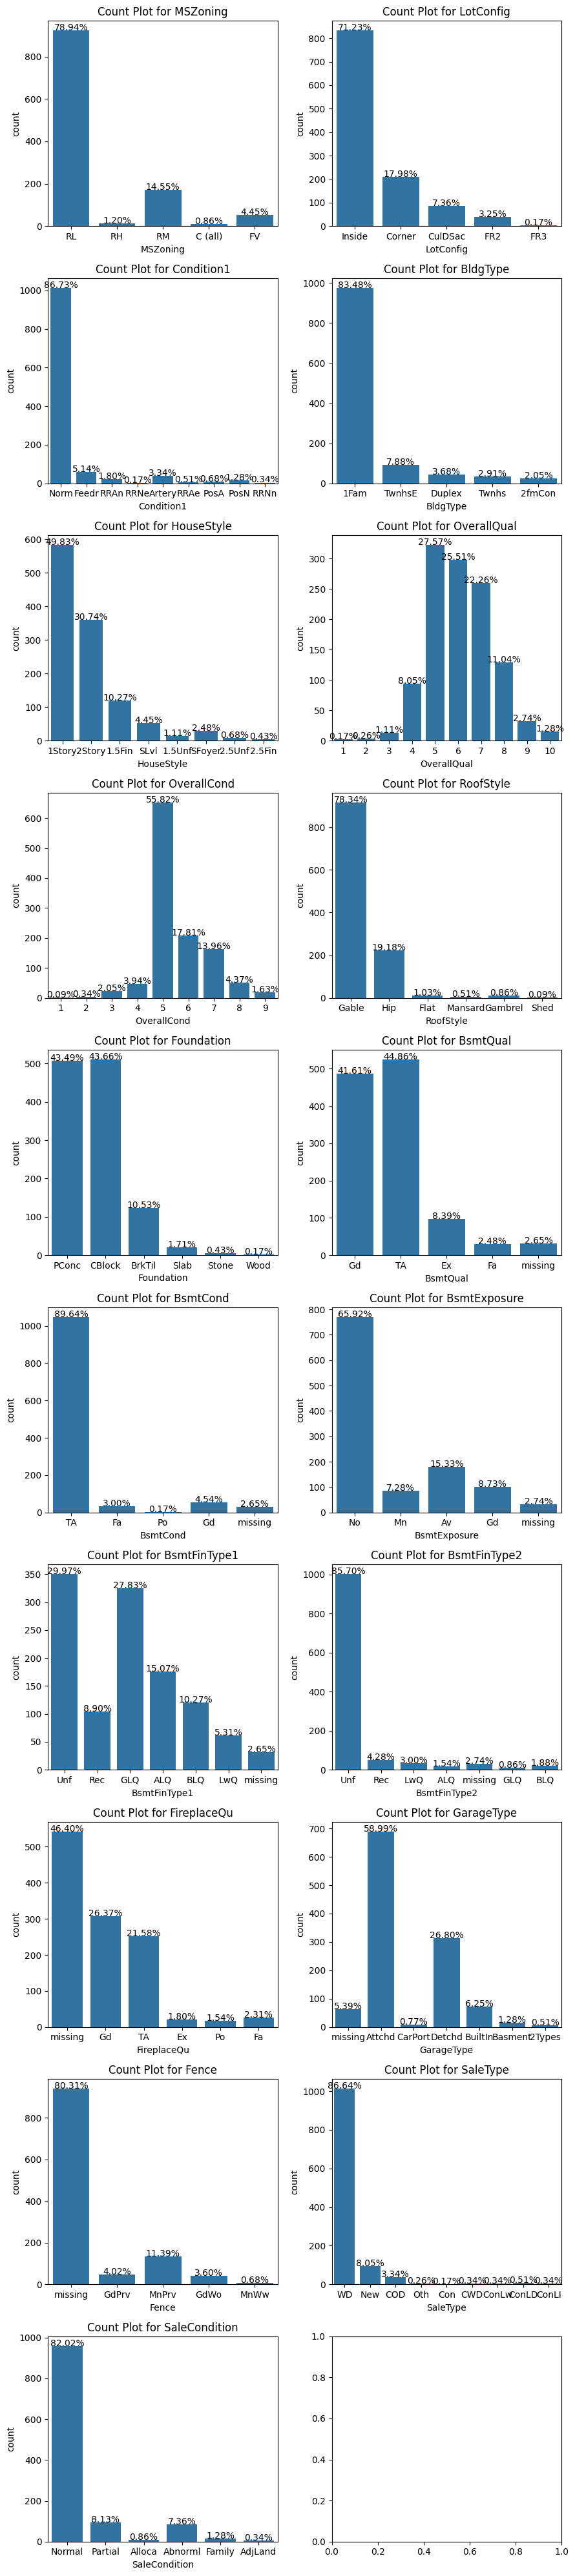

In [89]:
# Calculate percentage for each count
total_rows = len(fiveten_df)
percentages = (fiveten_df.value_counts() / total_rows) * 100

# Plot count plots with percentages
num_count_cols = len(fiveten_df.columns)
fig, axs = plt.subplots(nrows=(num_count_cols + 1) // 2, ncols=2, figsize=(9, 4 * ((num_count_cols + 1) // 2)))

for i, col in enumerate(fiveten_df.columns):
    ax = axs[i // 2, i % 2]
    sns.countplot(x=col, data=fiveten_df, ax=ax)
    ax.set_title(f'Count Plot for {col}')
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
                f'{height / total_rows * 100:.2f}%', ha='center')

plt.tight_layout()
plt.show()

Dont drop any of them. Just make sure that you ate eda_dfing according to feature importance

#### > 10 features

In [90]:
unique_values(cat_df)

,Total,Uniques,Values
ExterCond,1168,4,"[[TA, Fa, Gd, Ex]]"
KitchenQual,1168,4,"[[Fa, Gd, TA, Ex]]"
HeatingQC,1168,4,"[[TA, Ex, Gd, Fa]]"
ExterQual,1168,4,"[[TA, Fa, Gd, Ex]]"
MasVnrType,1168,4,"[[missing, BrkFace, BrkCmn, Stone]]"
GarageFinish,1168,4,"[[missing, Fin, Unf, RFn]]"
LotShape,1168,4,"[[IR1, Reg, IR2, IR3]]"
BldgType,1168,5,"[[1Fam, TwnhsE, Duplex, Twnhs, 2fmCon]]"
MSZoning,1168,5,"[[RL, RH, RM, C (all), FV]]"
BsmtExposure,1168,5,"[[No, Mn, Av, Gd, missing]]"


In [91]:
# Get the names of some discrete features
grtten_feats = [feat for feat in cat_cols 
            if (cat_df[feat].nunique()) >= 10 and
                 (cat_df[feat].nunique()) < 24
                ]
grtten_feats

['MSSubClass', 'OverallQual', 'Exterior1st', 'Exterior2nd', 'MoSold']

In [92]:
grtten_df = cat_df.loc[:, grtten_feats]
# grtten_df["SalePrice"] = num_df.loc[:, "SalePrice"]
grtten_df.head()

,MSSubClass,OverallQual,Exterior1st,Exterior2nd,MoSold
Id,,,,,
977,30,4,Wd Sdng,Wd Sdng,8
131,60,7,MetalSd,MetalSd,5
342,20,4,Wd Sdng,AsbShng,9
1107,20,7,HdBoard,HdBoard,5
1325,20,8,VinylSd,VinylSd,2


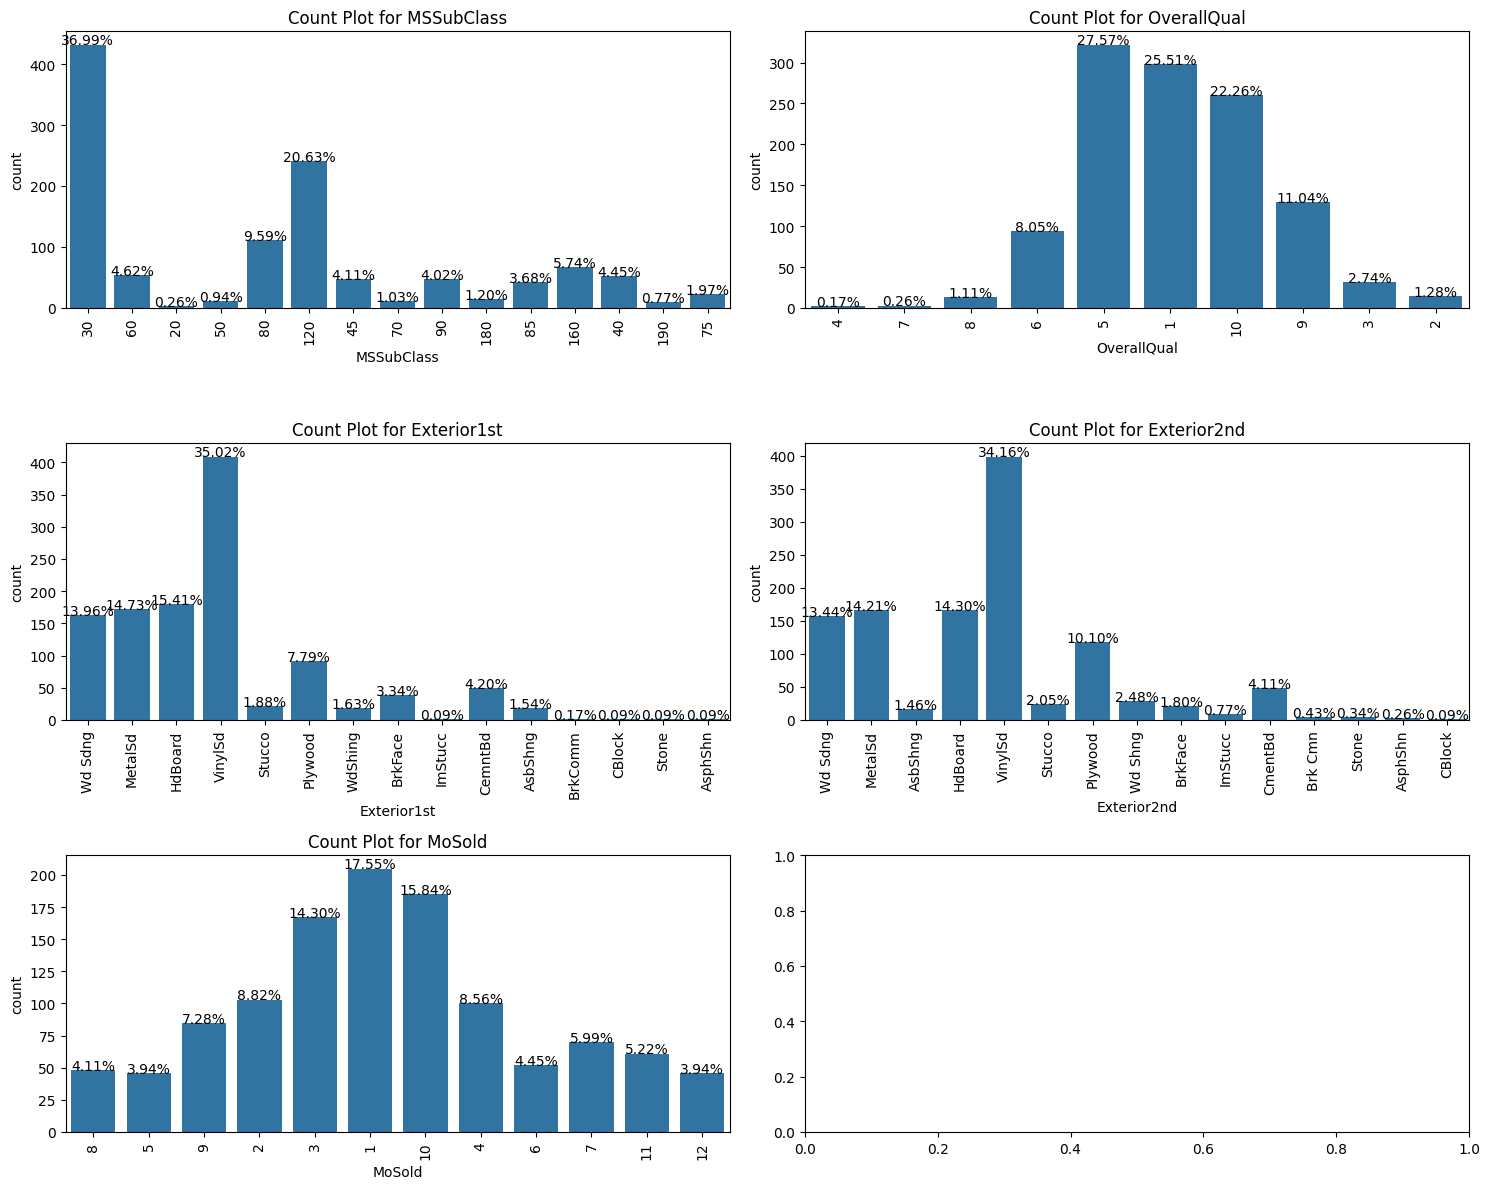

In [93]:
# Calculate percentage for each count
total_rows = len(grtten_df)
percentages = (grtten_df.value_counts() / total_rows) * 100

# Plot count plots with percentages
num_count_cols = len(grtten_df.columns)
fig, axs = plt.subplots(nrows=(num_count_cols + 1) // 2, ncols=2, figsize=(15, 4 * ((num_count_cols + 1) // 2)))

for i, col in enumerate(grtten_df.columns):
    ax = axs[i // 2, i % 2]
    sns.countplot(x=col, data=grtten_df, ax=ax)
    ax.set_title(f'Count Plot for {col}')
    ax.set_xticks(range(len(grtten_df[col].unique())))
    ax.set_xticklabels(grtten_df[col].unique(), rotation=90)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
                f'{height / total_rows * 100:.2f}%', ha='center')

plt.tight_layout()
plt.show()

# Transformation function

In [94]:
# Create a function to return the train and validation set
def ingest_and_split_train_val():
    df = pd.read_csv('dataset/train.csv', index_col='Id')
    
    train, val = train_test_split(
        df, test_size=0.2, 
        stratify=df['Neighborhood'], 
        shuffle=True, random_state=42)
    
    return train, val

In [95]:
# Test the function
train, val = ingest_and_split_train_val()
train.shape, val.shape

In [97]:
# Create a function to perform all the preporcessing on the dataset
def wrangle(df):
    # Numeric to categoricals
    cats = ["MSSubClass", "OverallCond", "OverallQual", "MoSold"]
    df[cats] = df[cats].astype(object)
    
    # Drop imbalanced columns
    df = df.drop(columns=[
         'Street', 'Utilities',
         'LandSlope', 'Condition2',
         'RoofMatl', 'Heating',
         'LowQualFinSF', 'KitchenAbvGr',
         'GarageQual', 'GarageCond',
         '3SsnPorch', 'PoolArea',
         'MiscVal'])

    # Add age columns
    df["Age"] = df["YrSold"] - df["YearBuilt"]
    df["RemodAddAge"] = df["YrSold"] - df["YearRemodAdd"]
    df["GrgAge"] = df["YrSold"] - df["GarageYrBlt"]

    # Drop year columns
    df = df.drop(columns=[
        'YearBuilt', 'YearRemodAdd', 
        'GarageYrBlt', 'YrSold'])

    # Skewed Half bath
    df = df.drop(columns=["BsmtHalfBath"])

    # Drop cols with > 90% missing values
    df = df.drop(columns=[
        'Alley', 'LandContour',
        'CentralAir', 'Electrical',
        'Functional', 'PavedDrive',
        'PoolQC', 'MiscFeature'])

    return df

In [98]:
# Test the function
train.shape, val.shape
train = wrangle(train)
val = wrangle(val)
train.shape, val.shape

((1168, 80), (292, 80))

The functions above are added to the python file in the root folder